In [53]:
import pandas as pd
import numpy as np

#### Week 3 - Pandas
Pandas, a library written by Wes McKinney, is a great tool for data manipulation and analysis. It provides two classes:
* a Series object, which handles a single column of data;
* a DataFrame object, which handles multiple columns (like an Excel spreadsheet).

You can build your own DataFrames or read in from other sources like CSVs or JSON. Pandas handles missing data beautifully; lets you sort, operate on and and merge datasets; provides plotting capabilities; and handles time series data (among other advantages).

#### 1.1 Creating Series and DataFrames

In [54]:
# Create a series by passing a list

towns = pd.Series(['Cardiff', 'Swansea', 'Abergavenny','Machynlleth'])
towns

0        Cardiff
1        Swansea
2    Abergavenny
3    Machynlleth
dtype: object

In [55]:
towns = ['Cardiff', 'Swansea', 'Abergavenny','Machynlleth']
populations = [335145, 230300, 12515, 2235]
number_of_pubs = [2100, 1680, 198, 48]

In [56]:
# Create an empty DataFrame, and add new columns to it

towns_df = pd.DataFrame()
towns_df['name'] = towns
towns_df['population'] = populations

In [57]:
# The columns have different dtypes

towns_df.dtypes

name          object
population     int64
dtype: object

In [58]:
# you can access the column names list as so:
towns_df.columns

Index(['name', 'population'], dtype='object')

In [59]:
# Create a DataFrame using dictionaries to specify column name and data

towns_df = pd.DataFrame({'name': towns,
                         'population': populations,
                         'n_pubs': number_of_pubs})

towns_df

,name,population,n_pubs
0,Cardiff,335145,2100
1,Swansea,230300,1680
2,Abergavenny,12515,198
3,Machynlleth,2235,48


#### 1.2 View and select data

In [60]:
# the .head() method shows the top rows

towns_df.head(2)

,name,population,n_pubs
0,Cardiff,335145,2100
1,Swansea,230300,1680


In [61]:
# check how many rows and columns
towns_df.shape

(4, 3)

In [62]:
# Inspect only one series using square bracket notation

towns_df['population']

0    335145
1    230300
2     12515
3      2235
Name: population, dtype: int64

In [63]:
# Or dot notation WARNING: not available in all circumstances, e.g. when defining a new column

towns_df.population

0    335145
1    230300
2     12515
3      2235
Name: population, dtype: int64

In [64]:
# Standard Python indexing works in the row direction

towns_df[:3]

,name,population,n_pubs
0,Cardiff,335145,2100
1,Swansea,230300,1680
2,Abergavenny,12515,198


In [65]:
# typically, column indexing should come first
towns_df['n_pubs']

0    2100
1    1680
2     198
3      48
Name: n_pubs, dtype: int64

In [66]:
towns_df['n_pubs'][:3]

0    2100
1    1680
2     198
Name: n_pubs, dtype: int64

#### 1.3 Select and manipulate data

In [67]:
# Use Boolean indexing to inspect values based on a condition

towns_df.loc[towns_df.name == 'Abergavenny']

,name,population,n_pubs
2,Abergavenny,12515,198


In [68]:
# Create a new column with math outputs

towns_df['pubs_per_capita'] = towns_df.n_pubs / towns_df.population
towns_df['people_per_pub'] = towns_df.population / towns_df.n_pubs

In [69]:
# Use a single column's value to select data

towns_df.loc[towns_df.people_per_pub < 150]

,name,population,n_pubs,pubs_per_capita,people_per_pub
1,Swansea,230300,1680,0.007295,137.083333
2,Abergavenny,12515,198,0.015821,63.207071
3,Machynlleth,2235,48,0.021477,46.562500


In [70]:
# Use the .sort_values() method
# Helpful parameter: set inplace = True if you want to modify your df

towns_df.sort_values(by = 'people_per_pub', inplace = True)

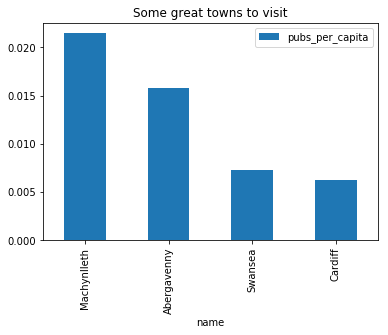

In [71]:
# Plot charts using the .plot() method 

towns_df.plot(x = 'name', y = 'pubs_per_capita', kind = 'bar', title = 'Some great towns to visit')

In [72]:
# Modify values

towns_df['to_visit'] = 'no'
towns_df.to_visit[towns_df.people_per_pub <50] = 'yes!'
towns_df

C:\Users\charl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,name,population,n_pubs,pubs_per_capita,people_per_pub,to_visit
3,Machynlleth,2235,48,0.021477,46.562500,yes!
2,Abergavenny,12515,198,0.015821,63.207071,no
1,Swansea,230300,1680,0.007295,137.083333,no
0,Cardiff,335145,2100,0.006266,159.592857,no


In [73]:
# More on .loc and .iloc
# .loc is a very flexible indexer. You can pass it pairs of (row, col) indexers to get a specific value:
towns_df.loc[towns_df['name'] == 'Cardiff', 'n_pubs']

0    2100
Name: n_pubs, dtype: int64

In [74]:
# you can also use this to set values:
towns_df.loc[towns_df['name'] == 'Cardiff', 'n_pubs'] = 0
towns_df.head(5)

,name,population,n_pubs,pubs_per_capita,people_per_pub,to_visit
3,Machynlleth,2235,48,0.021477,46.562500,yes!
2,Abergavenny,12515,198,0.015821,63.207071,no
1,Swansea,230300,1680,0.007295,137.083333,no
0,Cardiff,335145,0,0.006266,159.592857,no


In [75]:
#.iloc is used to get the row by its index - the special column to the furthest left.
# It only works with integer indexers, unlike .loc

In [76]:
towns_df.iloc[3]

name                  Cardiff
population             335145
n_pubs                      0
pubs_per_capita    0.00626594
people_per_pub        159.593
to_visit                   no
Name: 0, dtype: object

In [77]:
# you can change this index column by setting a new one:

In [78]:
towns_df = towns_df.set_index('name')
towns_df

,population,n_pubs,pubs_per_capita,people_per_pub,to_visit
name,,,,,
Machynlleth,2235,48,0.021477,46.562500,yes!
Abergavenny,12515,198,0.015821,63.207071,no
Swansea,230300,1680,0.007295,137.083333,no
Cardiff,335145,0,0.006266,159.592857,no


In [79]:
# this will fail as Cardiff is not an indexer
towns_df.iloc['Cardiff']

TypeError: Cannot index by location index with a non-integer key

In [80]:
# reformatting the towns_df DataFrame to make 'name' the index allows me to make calls like this using loc:
towns_df.loc['Cardiff','population']

335145

In [81]:
# indexes can be reset at any time:
towns_df = towns_df.reset_index()

In [82]:
# You can also select multiple columns at a time:

In [83]:
towns_df[['name','population']]

,name,population
0,Machynlleth,2235
1,Abergavenny,12515
2,Swansea,230300
3,Cardiff,335145


In [87]:
# you can see the index by calling it directly:
towns_df.index

RangeIndex(start=0, stop=4, step=1)

#### 1.2 Pandas II

In [135]:
# You can join pandas dataframes together in many ways

In [136]:
df_A = pd.DataFrame({
    'name':towns,
    'population':populations
})

df_B = pd.DataFrame({
    'name':towns,
    'pubs':number_of_pubs
})

In [137]:
pd.concat([df_A, df_B], axis = 1)

,name,population,name,pubs
0,Cardiff,335145,Cardiff,2100
1,Swansea,230300,Swansea,1680
2,Abergavenny,12515,Abergavenny,198
3,Machynlleth,2235,Machynlleth,48


In [138]:
pd.concat([df_A, df_B], axis = 0)

C:\Users\charl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,name,population,pubs
0,Cardiff,335145.0,NaN
1,Swansea,230300.0,NaN
2,Abergavenny,12515.0,NaN
3,Machynlleth,2235.0,NaN
0,Cardiff,NaN,2100.0
1,Swansea,NaN,1680.0
2,Abergavenny,NaN,198.0
3,Machynlleth,NaN,48.0


In [139]:
# These don't look correct! (N.B. - but they would be if each DF contained the same columns). 
# The way to get around this is to assign a common index that both frames share

In [140]:
df_A = df_A.set_index('name')

In [141]:
df_B = df_B.set_index('name')

In [142]:
df_A

,population
name,
Cardiff,335145
Swansea,230300
Abergavenny,12515
Machynlleth,2235


In [143]:
df_B

,pubs
name,
Cardiff,2100
Swansea,1680
Abergavenny,198
Machynlleth,48


In [144]:
df_A['pubs'] = df_B['pubs']

In [145]:
df_A

,population,pubs
name,,
Cardiff,335145,2100
Swansea,230300,1680
Abergavenny,12515,198
Machynlleth,2235,48


In [146]:
# You can also do this same operation via '.merge', a method of DataFrames, should they have the same index
df_A.merge(df_B, how = 'inner')

,population,pubs
0,335145,2100
1,230300,1680
2,12515,198
3,2235,48


In [147]:
# What if these dataFrames aren't the same size?

In [167]:
df_C = pd.DataFrame({
    'name':towns,
    'population':populations
})

In [168]:
df_D = pd.DataFrame({'name':'Winchester','population':40005}, index = [4])

In [169]:
df_D

,name,population
4,Winchester,40005


In [170]:
df_C = df_C.append(df_D)

In [171]:
df_C

,name,population
0,Cardiff,335145
1,Swansea,230300
2,Abergavenny,12515
3,Machynlleth,2235
4,Winchester,40005


In [172]:
df_C = df_C.set_index('name')

In [173]:
df_C

,population
name,
Cardiff,335145
Swansea,230300
Abergavenny,12515
Machynlleth,2235
Winchester,40005


In [174]:
df_B

,pubs
name,
Cardiff,2100
Swansea,1680
Abergavenny,198
Machynlleth,48


In [175]:
df_C['pubs'] = df_B['pubs']

In [176]:
df_C

,population,pubs
name,,
Cardiff,335145,2100.0
Swansea,230300,1680.0
Abergavenny,12515,198.0
Machynlleth,2235,48.0
Winchester,40005,NaN


In [177]:
df_C['pubs'].loc['Winchester']

nan

In [178]:
type(df_C['pubs'].loc['Winchester'])

numpy.float64

In [180]:
df_C['pubs'] = df_C['pubs'].fillna(850)

In [181]:
df_C

,population,pubs
name,,
Cardiff,335145,2100.0
Swansea,230300,1680.0
Abergavenny,12515,198.0
Machynlleth,2235,48.0
Winchester,40005,850.0


#### 2.1 Read data from files

In [ ]:
# Create a dataframe using read_csv()
# Here, we would use os.path.join() to 
df = pd.read_csv('pluto_18v2_1.csv')
df.shape

In [ ]:
df = df[::20]
df.shape
df.to_csv('pluto_shortened.csv')

In [ ]:
df = pd.read_csv('pluto_shortened.csv')
df.shape

In [ ]:
df.head()

#### 2.2 Save data back to files

In [ ]:
df.to_csv(os.path.join( [ your file location here!! ]) )